<a class="anchor" id="0"></a>
### **LightGBM Classifier in Python**

In [5]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [6]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")


### **Read dataset**

In [7]:
# load and preview data
df = pd.read_csv('./Breast_cancer_data.csv')
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


### **View summary of dataset**

In [8]:
# view summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


- We can see that there are 6 columns in the dataset and there are no missing values.

### **Check the distribution of target variable**

-  target variable is `diagnosis`
-  check the distribution of the target variable.

In [9]:
# check the distribution of the target variable
df['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

- The target variable is `diagnosis`. It contains 2 values - 0 and 1. 

- `0` is for **Negative prediction** and `1` for **Positive prediction**.

- We  can see that the problem is binary classification task.

### **Declare feature vector and target variable**

In [10]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

In [11]:
X = df[['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness']]
y = df['diagnosis']

### **Split dataset into training and test set**

In [12]:
# split the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### **LightGBM Model Development and Training**


- We need to convert our training data into LightGBM dataset format(this is mandatory for LightGBM training).

- After creating the necessary dataset, we created a python dictionary with parameters and their values. 

- Accuracy of the model depends on the values we provide to the parameters.

- In the end block of code, we simply trained model with 100 iterations.

In [13]:
# build the lightgbm model
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

LGBMClassifier()

## **Model Prediction**

In [14]:
# predict the results
y_pred=clf.predict(X_test)


### **View Accuracy**

In [15]:
# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.9298


- Here, `y_test` are the true class labels and `y_pred` are the predicted class labels in the test-set.

### **Compare train and test set accuracy**

- Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [16]:
y_pred_train = clf.predict(X_train)

In [17]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 1.0000


### **Check for Overfitting**

In [18]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9298


- The training and test set accuracy are quite comparable. <b>So, we cannot say there is overfitting.</b>

### **Confusion-matrix**

In [19]:
# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[42  5]
 [ 3 64]]

True Positives(TP) =  42

True Negatives(TN) =  64

False Positives(FP) =  5

False Negatives(FN) =  3


<AxesSubplot:>

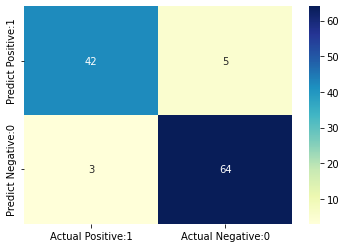

In [20]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### **Classification Metrices** 

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91        47
           1       0.93      0.96      0.94        67

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114



## **For Faster Speed** 

- Use bagging by setting `bagging_fraction` and `bagging_freq`.
- Use feature sub-sampling by setting `feature_fraction`.
- Use small `max_bin`.
- Use `save_binary` to speed up data loading in future learning.

## **For better accuracy**

- Use large `max_bin` (may be slower).
- Use small `learning_rate` with `large num_iterations`
- Use large `num_leaves`(may cause over-fitting)
- Use bigger training data
- Try `dart`
- Try to use categorical feature directly.

## **To deal with over-fitting**

- Use small `max_bin`
- Use small `num_leaves`
- Use `min_data_in_leaf` and `min_sum_hessian_in_leaf`
- Use bagging by set `bagging_fraction` and `bagging_freq`
- Use feature sub-sampling by set `feature_fraction`
- Use bigger training data
- Try `lambda_l1`, `lambda_l2` and `min_gain_to_split` to regularization
- Try `max_depth` to avoid growing deep tree

###  Use the following References and Tips <a class="anchor" id="7"></a>


- https://github.com/Microsoft/LightGBM

- https://github.com/microsoft/LightGBM/blob/master/docs/Parameters.rst


### Tip:  Hyper parameter settings

The hyper parameter settings are below. The settings below are best on a few iterations of training with some guided attempts driven by the documentation on the LightGBM website. They are far from the optimum..

In a real application we would adjust these to see the impact on loss - over numerous iterations. This would either be manual or more likely use a tool like [Optunity](https://optunity.readthedocs.io/en/latest/) or Hyperopt, to run automated hyper parameter tuning.


In [55]:
df = pd.read_csv('./Breast_cancer_data.csv')
X = df[['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness']]
y = df['diagnosis']

In [56]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

(114,)


In [ ]:
import lightgbm as lgb

In [89]:
# Without Hyper-parameter tuinng
lgb_clf = lgb.LGBMClassifier(boosting_type='gbdt',  
                             objective='binary', 
                             metric='auc')

lgb_clf.fit(X_train, y_train,
            eval_set=[(X_test, y_test)],
            eval_metric='l1',
            early_stopping_rounds=1000,
            verbose= False)

accuracy_score(y_test, lgb_clf.predict(X_test))



0.9473684210526315

In [90]:
lgb_clf.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': 'binary',
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0,
 'metric': 'auc'}

import optunity \
import optunity.metrics \
import sklearn.svm

data = X
labels = y
#### score function: twice iterated 10-fold cross-validated accuracy
@optunity.cross_validated(x=data, y=labels, num_folds=10, num_iter=2) \
def gbm_auc(X_train, y_train, X_test, y_test, learning_rate): \
    #model = sklearn.svm.SVC(C=10 ** logC, gamma=10 ** logGamma).fit(x_train, y_train) \
    model = lgb.LGBMClassifier(learning_rate=100 ** learning_rate).fit(X_train, y_train) \
    decision_values = model.decision_function(X_test) \
    return optunity.metrics.roc_auc(y_test, decision_values) \
#### perform tuning
hps, _, _ = optunity.maximize(gbm_auc, num_evals=200, learning_rate =[100,1000]) \
#### train model on the full training set with tuned hyperparameters
optimal_model = lgb.LGBMClassifier(learning_rate=100 ** hps['learning_rate']).fit(data, labels) \

In [45]:
def report_results(classifier, y_pred):
    print(f"Accuracy/Score: {accuracy_score(y_test, y_pred)}")
    print(f"Precision = {precision_score(y_test,y_pred)}\n")
    print(f"Confusion Matrix:\n {confusion_matrix(y_test,y_pred)}")
    plot_confusion_matrix(classifier, X_test, y_test,values_format="d",cmap='Blues')
    print(classification_report(y_test,y_pred, digits=4))
    roc(classifier)

In [46]:
def roc(model_name):
    logit_roc_auc = roc_auc_score(y_test, model_name.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, model_name.predict_proba(X_test)[:,1])
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, label=f"{str(model_name.__class__.__name__)}(area = {round(logit_roc_auc,2)})")
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

In [91]:
from sklearn.model_selection import GridSearchCV

In [47]:
def fit_predict_score(model):
    model.fit(X_train,y_train)
    trian_pred = model.predict(X_train) 
    y_pred = model.predict(X_test)
    report_results(y_pred, trian_pred)

In [110]:
param_grid = {
    #'min_child_samples' : [10,20],
    #'learning_rate' : [0.001, 0.005, 0.01],
    #'n_estimators' : [100, 1000],
    #"max_depth": [-1,4,6,8],
    }

In [111]:
lgb_estimator = lgb.LGBMClassifier(boosting_type='gbdt',  
                                   objective='binary', 
                                   num_boost_round=2000, 
                                   learning_rate=0.01, 
                                   num_leaves=128,
                                   max_bin=512,
                                   max_deapth=-1,
                                   n_estimetors= 100,
                                   min_child_samples=20,
                                   metric='auc')

In [112]:
gsearch = GridSearchCV(estimator=lgb_estimator, param_grid=param_grid, cv=5)

In [113]:
lgb_model = gsearch.fit(X_train, y_train,
                        eval_set=[(X_test, y_test)],
                        eval_metric='l1',
                        early_stopping_rounds=1000,
                        verbose= False)

[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] num

In [118]:
lgb_model.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__boosting_type': 'gbdt',
 'estimator__class_weight': None,
 'estimator__colsample_bytree': 1.0,
 'estimator__importance_type': 'split',
 'estimator__learning_rate': 0.01,
 'estimator__max_depth': -1,
 'estimator__min_child_samples': 20,
 'estimator__min_child_weight': 0.001,
 'estimator__min_split_gain': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': -1,
 'estimator__num_leaves': 128,
 'estimator__objective': 'binary',
 'estimator__random_state': None,
 'estimator__reg_alpha': 0.0,
 'estimator__reg_lambda': 0.0,
 'estimator__silent': 'warn',
 'estimator__subsample': 1.0,
 'estimator__subsample_for_bin': 200000,
 'estimator__subsample_freq': 0,
 'estimator__num_boost_round': 2000,
 'estimator__max_bin': 512,
 'estimator__metric': 'auc',
 'estimator': LGBMClassifier(learning_rate=0.01, max_bin=512, metric='auc',
                num_boost_round=2000, num_leaves=128, objective='binary'),
 'n_jobs': None,
 'param_grid': {'min_child_sam

In [116]:
y_pred = lgb_model.predict(X_test)

Accuracy/Score: 0.956140350877193
Precision = 0.9852941176470589

Confusion Matrix:
 [[42  1]
 [ 4 67]]
              precision    recall  f1-score   support

           0     0.9130    0.9767    0.9438        43
           1     0.9853    0.9437    0.9640        71

    accuracy                         0.9561       114
   macro avg     0.9492    0.9602    0.9539       114
weighted avg     0.9580    0.9561    0.9564       114



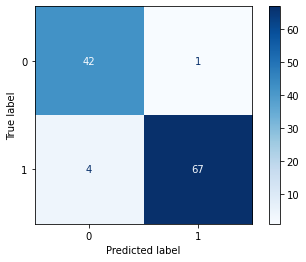

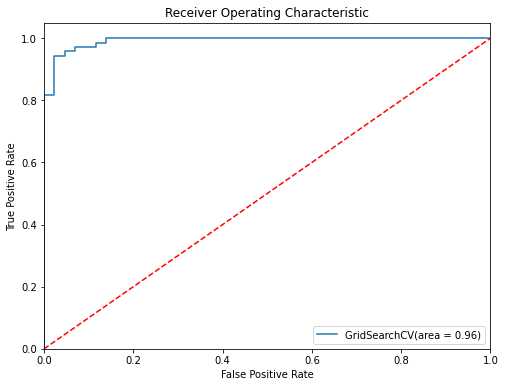

In [117]:
report_results(lgb_model, y_pred)

### Task 3:
### Which should you choose?
XGBoost or  LightGBM ?
read this article:<br/>

https://www.datarobot.com/blog/what-are-xgboost-and-lightgbm/
<br/>
https://www.springboard.com/blog/data-science/xgboost-random-forest-catboost-lightgbm/
<br/>

and reflect your previous code?

XGBoost require that data is presorted and binned before splitting \
It is not very memory efficient and large datasets can cause out-of-memory problems \
Additionally, because it builds trees depth-first (i.e., going down the tree’s levels) \
It can take longer to find lower-error trees. \
Also XGBoost cannot handle categorical variables natively, \
it is up on the programmer to encode those before training. 

LightGBM tends to be more CPU- and memory-efficient and works well with large datasets. \
It achieves this with its splitting methods: GOSS emphasizes features that provide the most \
information for a split, thereby reducing data size without impacting accuracy. 
Its also builds trees best-first (i.e., going across the tree’s leaves). 
It can handle categorical variables natively. 
However, the algorithm does make some approximations that can affect accuracy depending on the data. \
For example, efficient feature bundling is NP-hard (computationally intractable), \
so it has to tolerate overlap between non-zero values in order to achieve performance.

LightGBM also boasts accuracy and training speed increases over XGBoost in five of the benchmarks \
examined in its original publication.

To XGBoost’s credit, XGBoost has been around longer than LightGBM, \
so it has better learning resources and a more active developer community

From latest update in Kaggle:
XGBoost now implements feature binning much like LightGBM to better handle sparse data. \
Additionally, XGBoost can grow decision trees in best-first fashion similar to LightGBM. 

Conclusion:
In the end, the one that will be choosed will depend on the data. \
Each model a plethora of parameters for tuning for better performance and accuracy. 